# 1c - Plotting exercises with `matplotlib` and `Seaborn`

## 1. Plotting simple functions

Example: plotting `sin(x ** 2)` for `x` between `-pi` and `pi`:

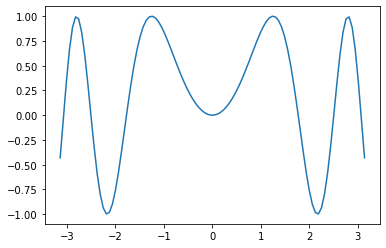

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-np.pi, np.pi, 100)
y = np.sin(x ** 2)

plt.plot(x, y)

**Exercise 1:** Plot the function `(x ** 2) * sin(1/x)` in the interval `[1e-5, pi]`.

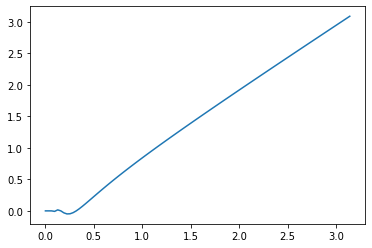

In [2]:
x = np.linspace((1e-5), np.pi, 100)
y = (x ** 2) * np.sin(1/x)

plt.plot(x, y)

**Exercise 2:** In the previous plot
- Change the linestyle to dotted, and the color to `#4A5859`.
- Add an appropiate title.

Text(0.5, 1.0, 'Plot of function (x ** 2) * sin(1/x) in the interval `[1e-5, pi]')

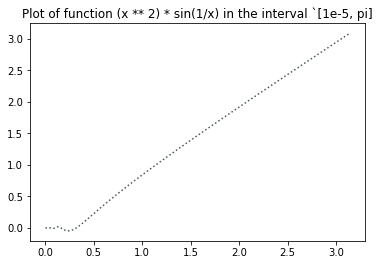

In [3]:
plt.plot(x, y, linestyle='dotted', color= "#4A5859" )
plt.title("Plot of function (x ** 2) * sin(1/x) in the interval `[1e-5, pi]")

**Exercise 3:** In the plot of exercise 1, remove all ticks in the x axis. ([Hint](https://stackoverflow.com/a/12998531))

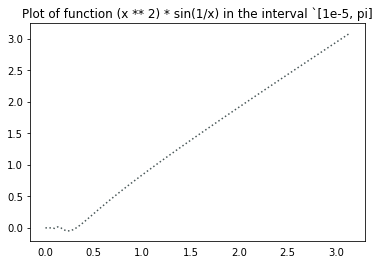

In [11]:
plt.plot(x, y, linestyle='dotted', color= "#4A5859" )
plt.title("Plot of function (x ** 2) * sin(1/x) in the interval `[1e-5, pi]")
plt.tick_params(axis='x', which='both', bottom=False, top=False) # to remove labels as well could add: labelbottom=False
plt.show()

## 2. Using subplots

In the following exercises we will replicate this image:

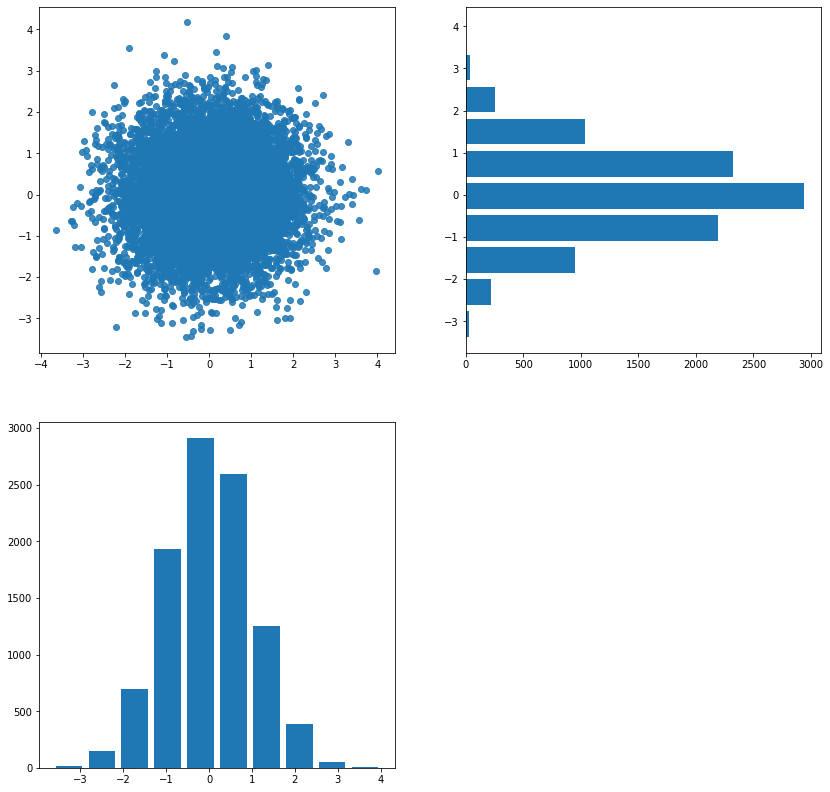

For that, we will `numpy`'s random numbers.

In [12]:
np.random.seed(1)
x = np.random.normal(0, 1, size=(10000,))
y = np.random.normal(0, 1, size=(10000,))

In [13]:
x, y

(array([ 1.62434536, -0.61175641, -0.52817175, ..., -1.01414382,
        -0.06269623, -1.43786989]),
 array([-0.12247391,  0.22816982, -0.35230513, ...,  2.4084338 ,
         0.88278555, -0.09959631]))

These arrays contain 100 numbers that are normally distributed around 0, with variance 1 each. The `np.random.seed(1)` allows us to replicate the same random numbers every time we run the cell.

**Exercise 4:** Create a 2x2 subplots figure. Set the size of the figure to be 14 by 14.

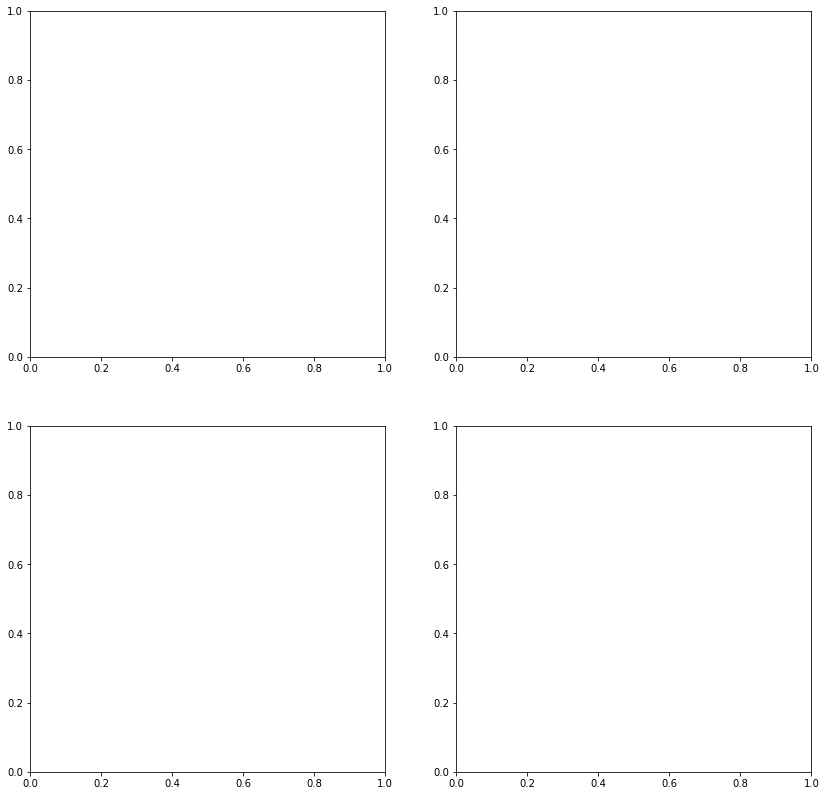

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(14,14))

**Exercise 5:** In position `(0,0)` plot a scatter of x and y. Make the points a little bit transparent with an `alpha` of `0.85`.

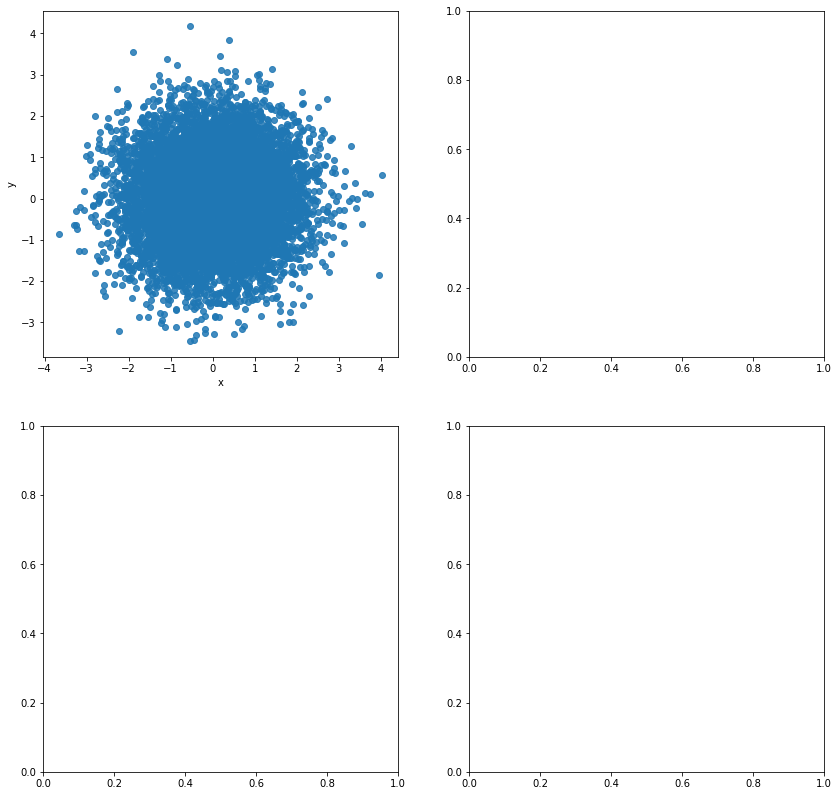

In [15]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

axes[0, 0].scatter(x, y, alpha=0.85)
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')

plt.show()


**Exercise 6:** Place a histogram of x in position `(1,0)`. Place a horizontal histogram of y in position `(0,1)`, and finish by turning off the axis in position `(1,1)`. To make it look slighly prettier, we can change the colors (as you wish) and we can reduce the width of the histogram bars using the `rwidth` keyword argument in the `.hist` calls.

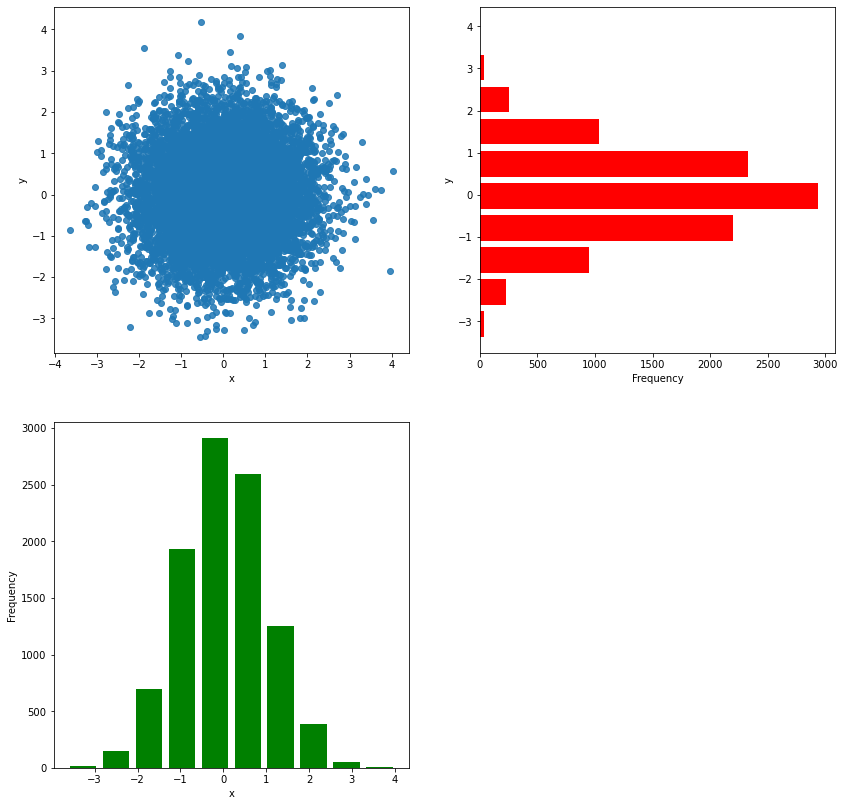

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(14, 14))

axes[0, 0].scatter(x, y, alpha=0.85)
axes[0, 0].set_xlabel('x')
axes[0, 0].set_ylabel('y')

axes[1, 0].hist(x,rwidth = 0.8, color = "g")
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('Frequency')

axes[0, 1].hist(y, orientation='horizontal', rwidth = 0.8, color = "r")
axes[0, 1].set_xlabel('Frequency')
axes[0, 1].set_ylabel('y')

axes[1,1].axis("off")

plt.show()

## 3. Using seaborn for prettier plots

As you might have seen, `matplotlib` plots are pretty ugly. There is another plotting package, called `seaborn`, that has better-looking default plots, mostly focused on statistics. In these next exercises we will showcase some of the plots you can easily get with `seaborn`.

In [17]:
import seaborn as sns
sns.set_theme()  # applying the default seaborn theme

The backend of `seaborn` still accepts `numpy` arrays, so let's use the same arrays we defined in the previous exercise:

In [18]:
np.random.seed(1)
x = np.random.normal(0, 1, size=(10000,))
y = np.random.normal(0, 1, size=(10000,))

**Exercise 7:** Plot the histogram and distribution of these points in a (1, 2) subplot. Use `sns.histplot`, pass the axis at the `ax` flag, with the `kde` keyword argument being `True`.

<AxesSubplot:ylabel='Count'>

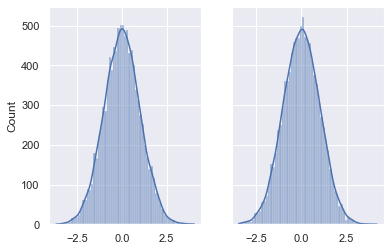

In [23]:
fig, (ax1, ax2) = plt.subplots(1,2, sharey=True)
sns.histplot(x, kde= "True", ax= ax1)
sns.histplot(y, kde= "True", ax=ax2)

**Exercise 8**: In this final exercise, we will combine what we learned from `pandas` with `seaborn`.

1. Load up a DataFrame `df` using `read_csv` from the following address: `https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data`. The column names are `sepal_length, sepal_width, petal_length, petal_width, class`. This data, known as the IRIS classification task, consists of measurements for different types of three different types of flowers: setosas, versicolors and virginicas.

In [19]:
import pandas as pd

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width","class"]
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", names=columns)
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


2. Check [the documentation of `sns.pairplot`](https://seaborn.pydata.org/generated/seaborn.pairplot.html#seaborn.pairplot). Apply it to our `df` using `"class"` in the `hue` keyword argument.

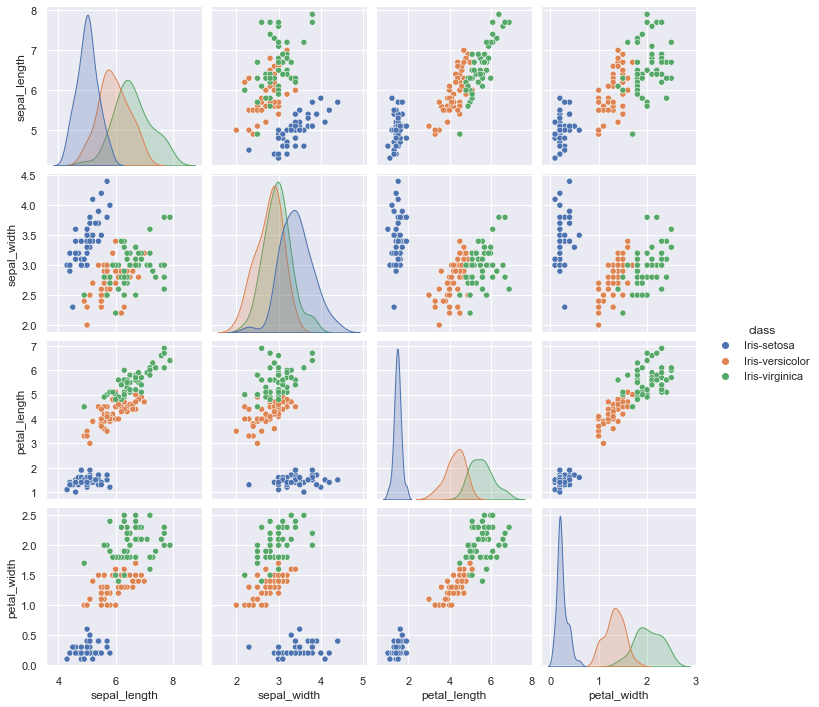

In [20]:
sns.pairplot(df, hue= "class")

3. What is this plot telling you? What can you say about the differences between the classes?

**General Discription Plots:** 
* The plots display scatter plots of 2 variables, and on the diagonal, the distribution/histogram of one variable is shown (as there is no useful scatter plot between the same variable).
* In total, each combination of the variables petal and sepal, and respectively length and width, are shown.
* It has to be noticed that due to the square visualization, each combination of variables is repeated, and thus the scatter plots are flipped for the corresponding pair.

**Main displayed information:** 
* Due to the hue in each plot, the visualization is separated by color depending on the 3 classes.
* Thus, it is possible to see differences of the classes regarding the named variables.

**Main Findings:** 
* The plots indicate that the classes are well separated as the colored points are nicely differentiable (grouped together by class). Thus, classes are considered a good indicator to differentiate irises. Iris-setosa has the largest difference from the other two classes, which can be seen as its cluster is more far away from the clusters of the other two. Iris-versicolor and iris-virginica are more overlapping in the scatterplots.
* Furthermore, some plots show a more easy differentiation between the iris types than others. For instance, the sepal_length and sepal_width scatterplot shows some overlap between the classes, and the clusters are not far away from each other. Thus, those variables are not considered strong indicators for seperating iris types.
* Regarding the diagonal plots, the best differentiation is visible for petal width and petal length because the overlap of the classes is the smallest. On the other hand, the histograms of sepal_width of the classes are closer to each other. This indicates that this feature is not helping a lot to distinguish between the classes.